# 10.41463253

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data
import pandas as pd  # Import the pandas library
path = '/content/drive/MyDrive/Colab Notebooks/zindi/GeoAI/'
train_data = pd.read_csv(path + 'Train.csv')
test_data = pd.read_csv(path + 'Test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# train_data columns  and test_data columns print

print("Train Data Columns:", train_data.columns)
print("Test Data Columns:", test_data.columns)


Train Data Columns: Index(['ID_Zindi', 'Date', 'ID', 'LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure', 'GT_NO2'],
      dtype='object')
Test Data Columns: Index(['ID_Zindi', 'Date', 'ID', 'LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure'],
      dtype='object')


In [ ]:
print('Training data shape: ', train_data.shape)
print('Testing data shape: ', test_data.shape)

# First few rows of the training dataset
train_data

Training data shape:  (86584, 14)
Testing data shape:  (6576, 13)


,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.000
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.000
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.000
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.000
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86579,ID_NCWXIY,31-12-21,X9897,45.498227,9.556232,0.000000,NaN,-0.434350,0.250490,0.000032,0.000643,NaN,13063.79770,39.750
86580,ID_UDQIEE,31-12-21,X9928,45.142541,10.043836,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.125
86581,ID_ENDUPX,31-12-21,X9969,45.842207,9.351658,0.000000,284.98,-0.157753,0.000000,0.000031,0.000153,0.000122,13050.16499,28.325
86582,ID_3ZBA6C,31-12-21,X9993,45.113503,8.874065,0.000000,NaN,-0.798636,0.399524,0.000031,0.000717,NaN,13061.41329,21.250


In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
train_missing= missing_values_table(train_data)
train_missing

Your selected dataframe has 14 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
LST,39786,46.0
NO2_trop,35473,41.0
AAI,12875,14.9
CloudFraction,12875,14.9
NO2_strat,12875,14.9
NO2_total,12875,14.9
TropopausePressure,12875,14.9
GT_NO2,4533,5.2


In [ ]:
test_missing= missing_values_table(test_data)
test_missing

Your selected dataframe has 13 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
LST,2981,45.3
NO2_trop,2578,39.2
AAI,868,13.2
CloudFraction,868,13.2
NO2_strat,868,13.2
NO2_total,868,13.2
TropopausePressure,868,13.2


# Detecting missing data visually using Missingno library

In [ ]:
# !pip install missingno

<Axes: >

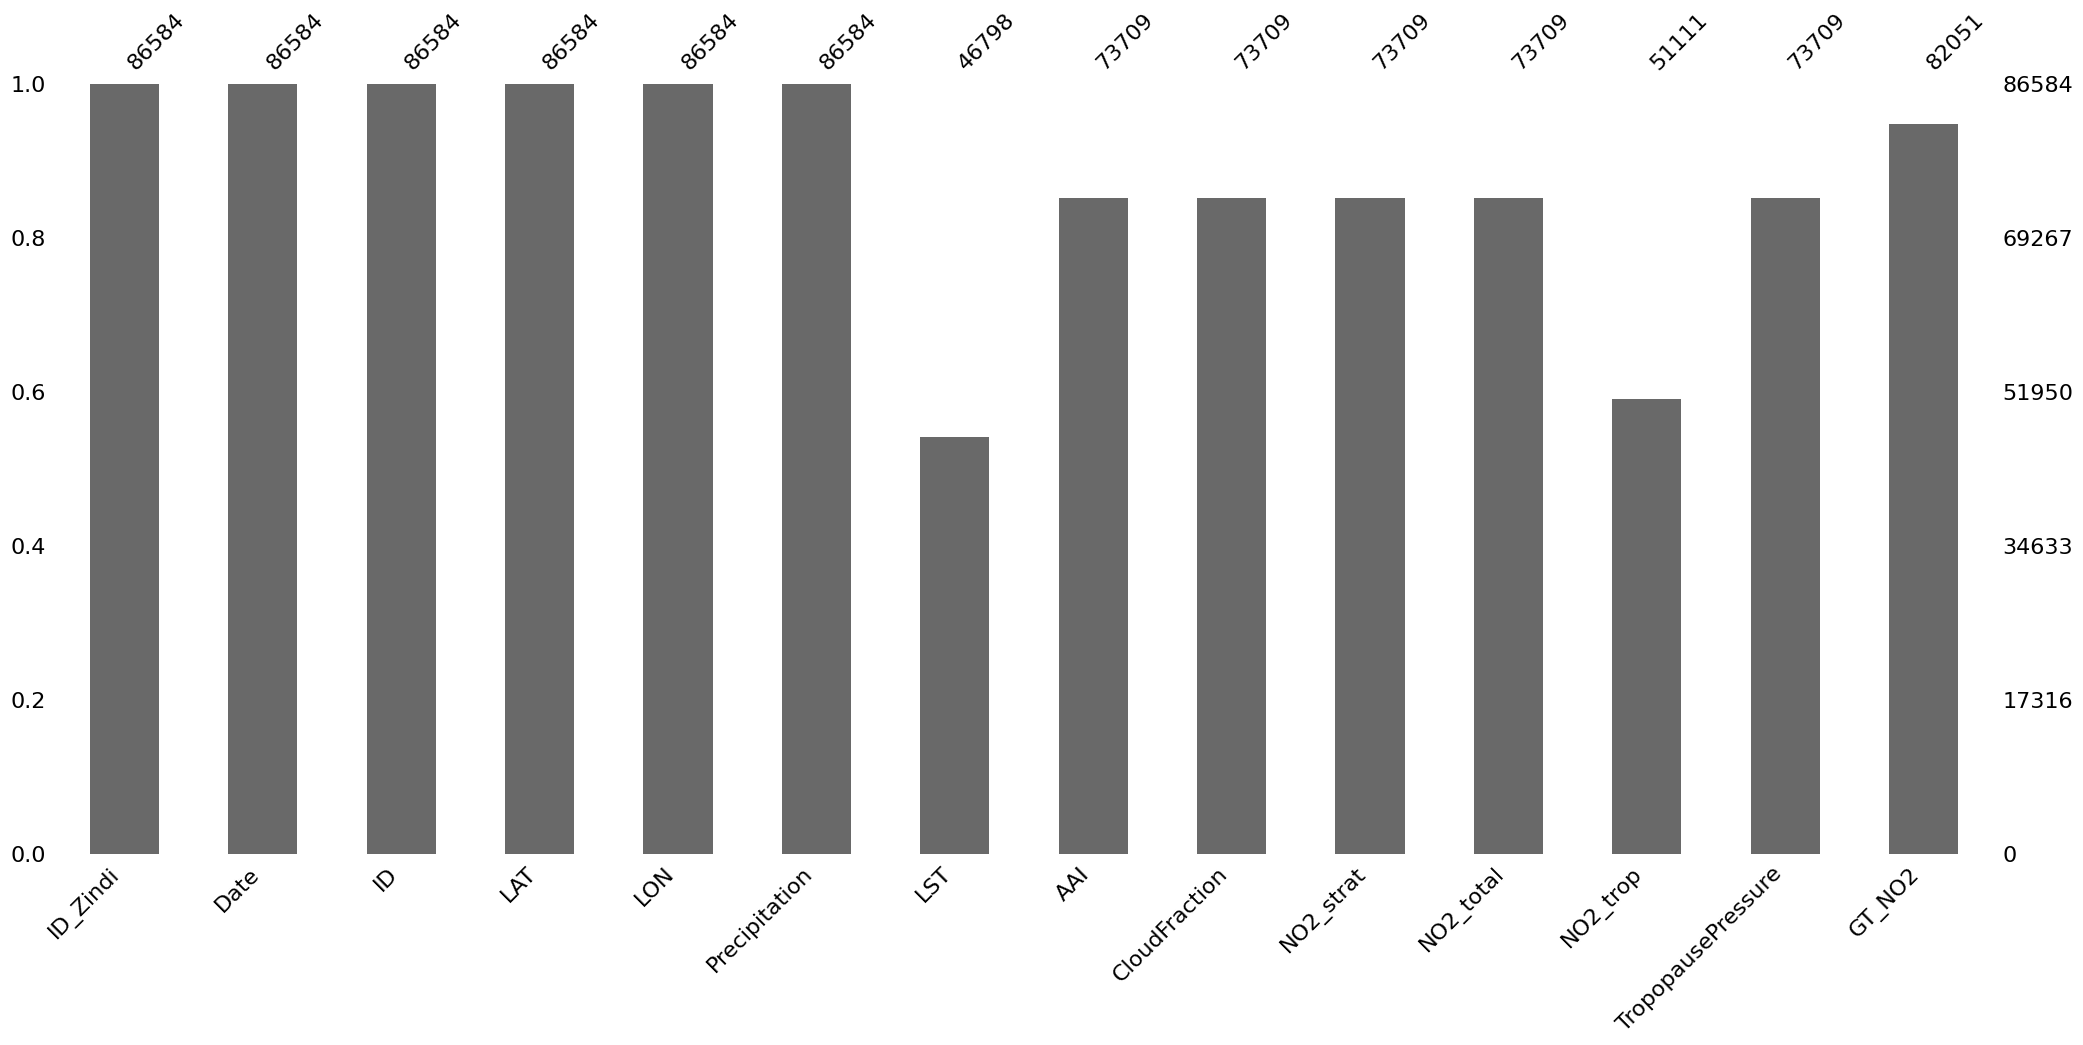

In [ ]:
import missingno as msno # Import the missingno module

msno.bar(train_data)

# Visualizing the locations of the missing data

<Axes: >

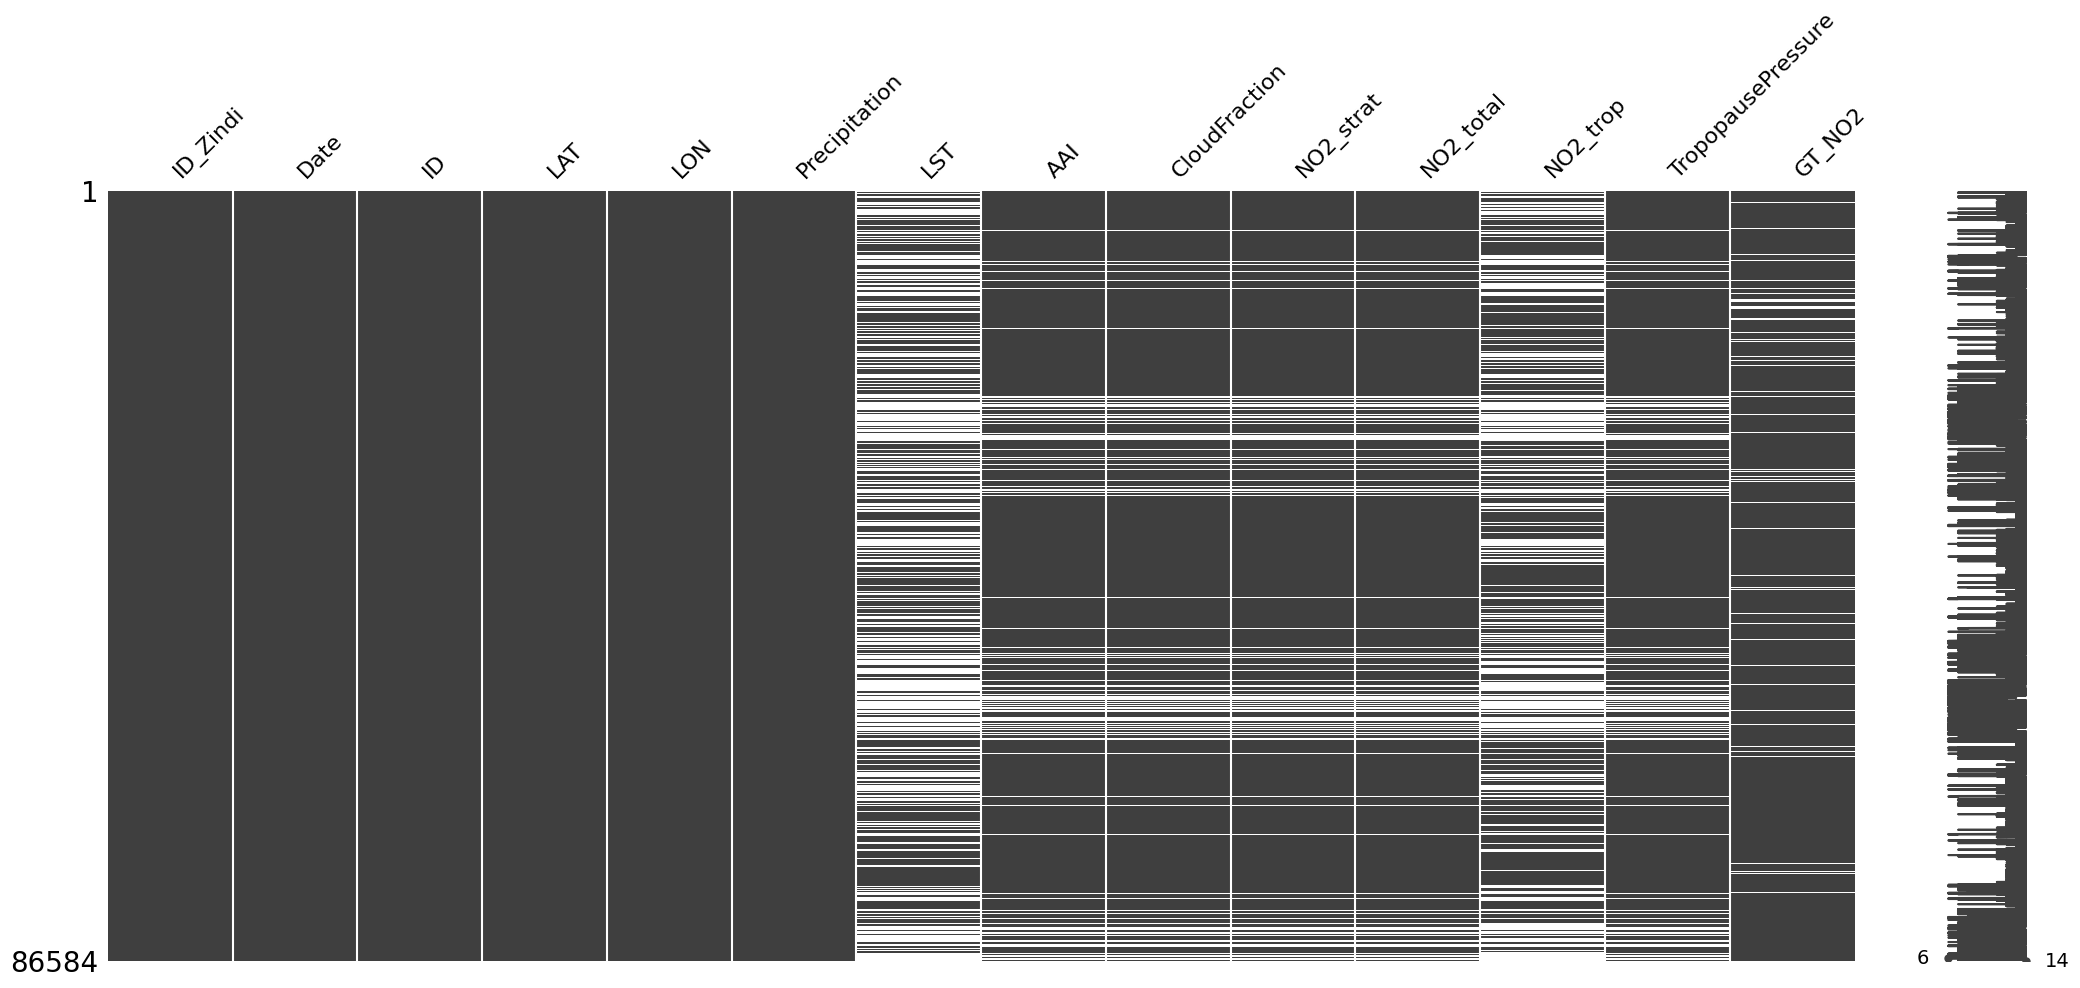

In [ ]:
msno.matrix(train_data)

In [ ]:
# !pip install pysal

In [ ]:
import geopandas as gpd
from pysal.lib import weights
from pysal.model import spreg
from sklearn.impute import SimpleImputer
import numpy as np

# Function to process and impute data
def impute_spatial_data(data, required_columns, k_neighbors=10):
    # Ensure all required columns exist in the DataFrame
    for col in required_columns:
        if col not in data.columns:
            data[col] = np.nan

    # Convert the DataFrame to a GeoDataFrame
    gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.LON, data.LAT))

    # Drop rows with missing 'LAT' or 'LON' as spatial weights cannot be calculated without coordinates
    gdf = gdf.dropna(subset=['LAT', 'LON'])

    # Create a spatial weights matrix based on k-nearest neighbors
    knn_weights = weights.KNN.from_dataframe(gdf, k=k_neighbors)

    # Fill missing values with initial guesses using SimpleImputer (mean strategy)
    imputer = SimpleImputer(strategy='mean')
    available_features = [col for col in required_columns if col in gdf.columns]
    gdf[available_features] = imputer.fit_transform(gdf[available_features])

    # Spatial Lag Model to handle remaining missing values
    for col in available_features:
        if gdf[col].isnull().sum() > 0:
            # Define the dependent variable (target) and independent variables (features)
            y = gdf[col].values.reshape(-1, 1)
            X = gdf.drop(columns=[col, 'ID_Zindi', 'Date', 'ID', 'LAT', 'LON', 'geometry']).values

            # Fit the Spatial Lag Model
            model = spreg.ML_Lag(y, X, w=knn_weights, name_y=col, name_x=gdf.columns.drop([col, 'ID_Zindi', 'Date', 'ID', 'LAT', 'LON', 'geometry']).tolist())

            # Predict missing values
            predicted_values = model.predy.reshape(-1)

            # Replace missing values with predicted ones
            gdf.loc[gdf[col].isnull(), col] = predicted_values[gdf[col].isnull()]

    # Drop the geometry column and return the imputed data
    return gdf.drop(columns=['geometry'])

# Define required columns for train and test data
train_required_columns = ['LST', 'NO2_trop', 'AAI', 'CloudFraction', 'NO2_strat', 'NO2_total', 'TropopausePressure', 'GT_NO2']
test_required_columns = ['LST', 'NO2_trop', 'AAI', 'CloudFraction', 'NO2_strat', 'NO2_total', 'TropopausePressure']  # Excludes 'GT_NO2'

# Process and impute the training data
train_data = impute_spatial_data(train_data, train_required_columns)

# Process and impute the test data
test_data = impute_spatial_data(test_data, test_required_columns)

# # Save the imputed DataFrames
# train_data.to_csv(path + 'Train_Imputed.csv', index=False)
# test_data.to_csv(path + 'Test_Imputed.csv', index=False)

# Check for any remaining missing values in the datasets
print("Training data missing values summary:")
print(train_data.isnull().sum()[train_data.isnull().sum() > 0])

print("Test data missing values summary:")
print(test_data.isnull().sum()[test_data.isnull().sum() > 0])


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 79 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Training data missing values summary:
Series([], dtype: int64)
Test data missing values summary:
Series([], dtype: int64)


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


<Axes: >

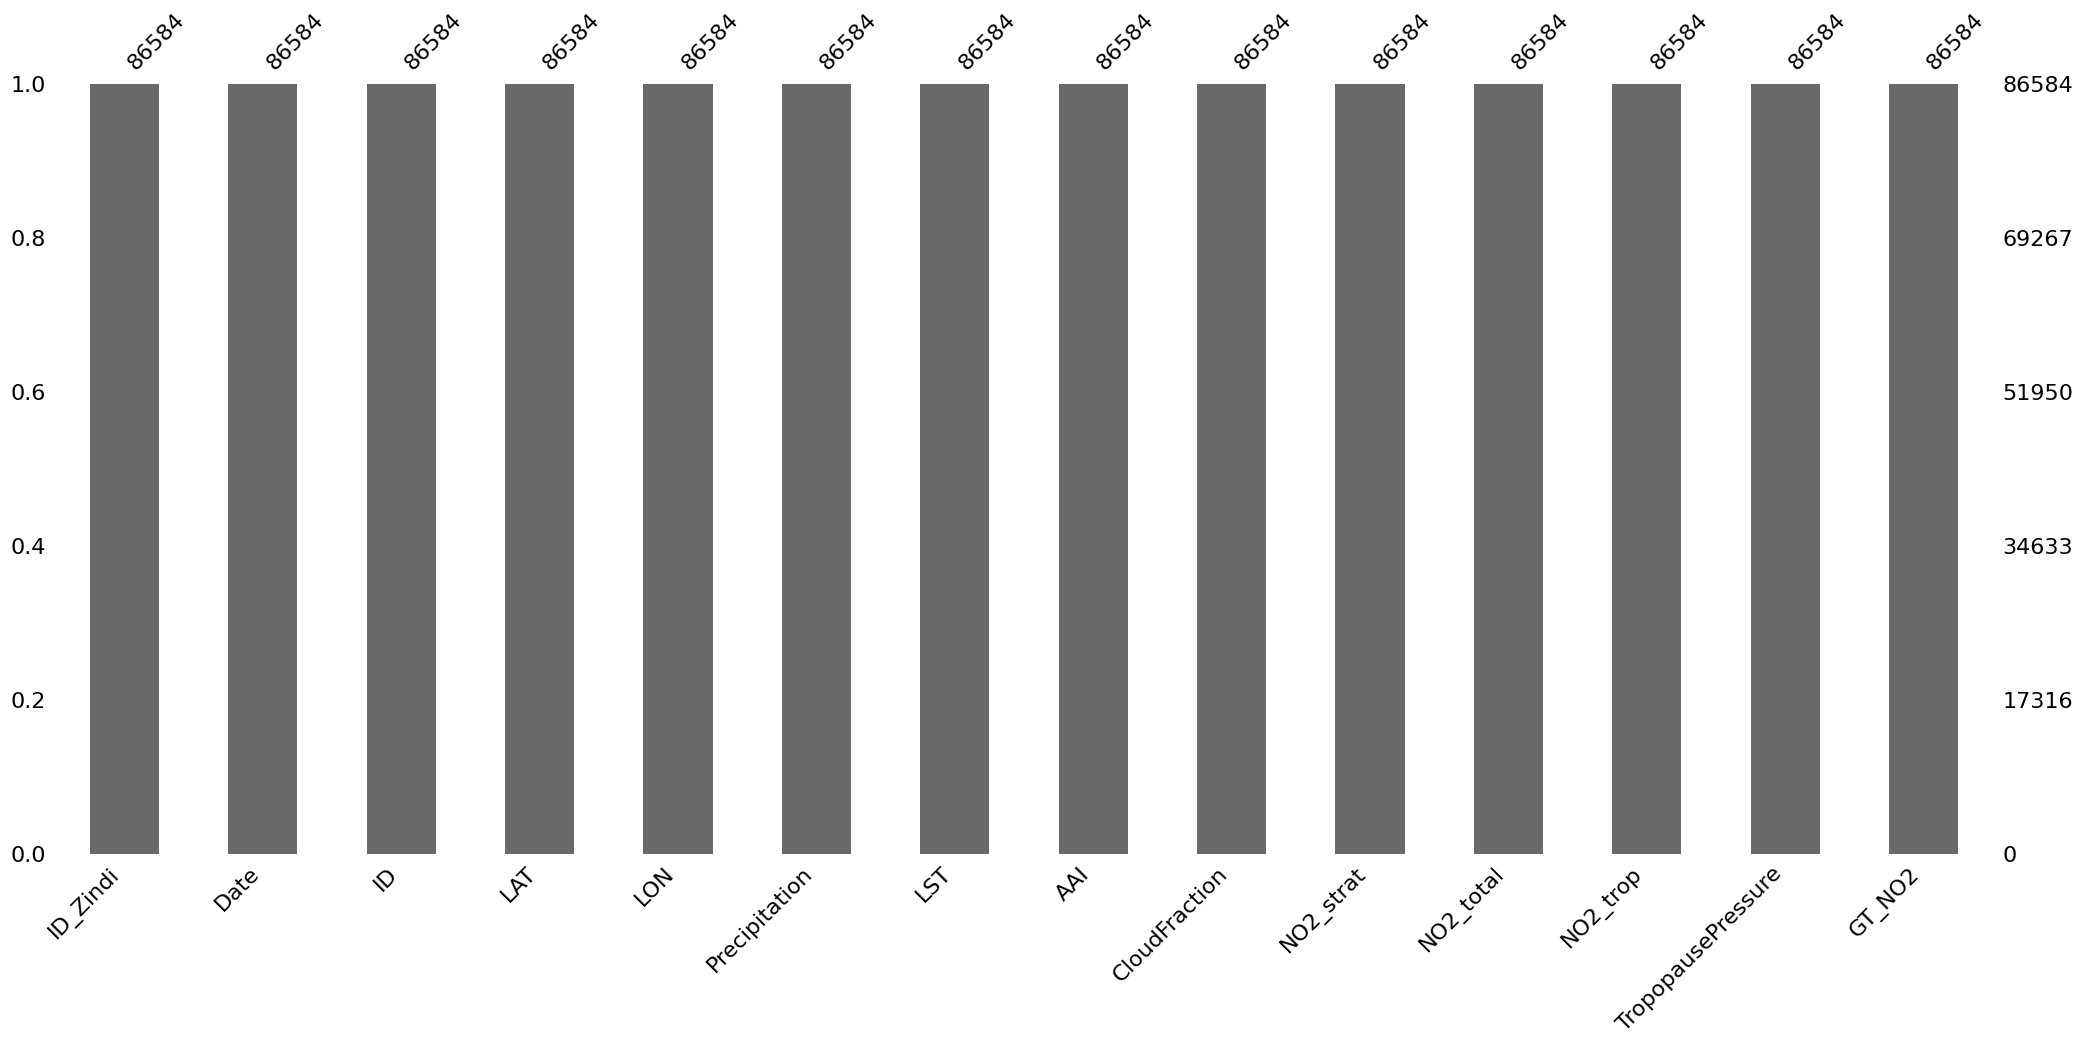

In [ ]:
msno.bar(train_data)

<Axes: >

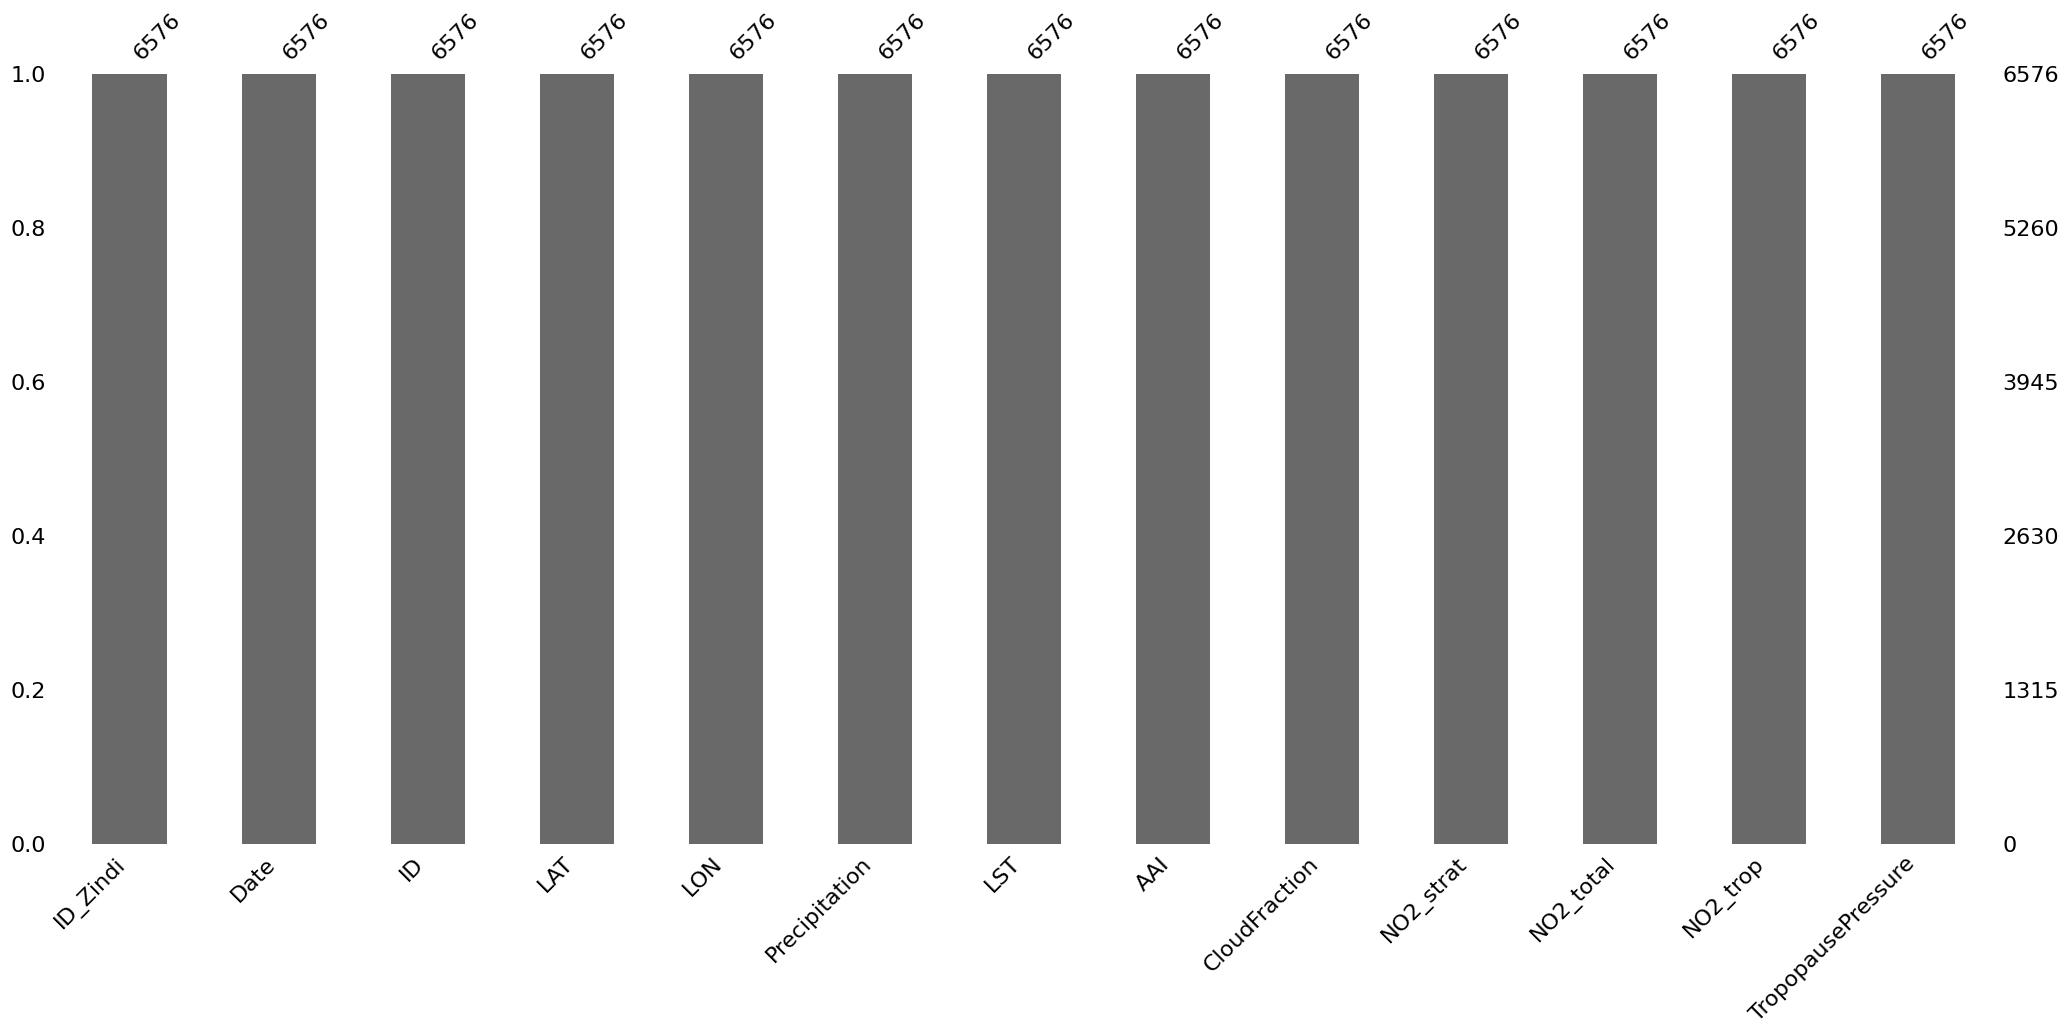

In [ ]:
msno.bar(test_data)

In [ ]:
# Data Preprocessing

# Selecting relevant predictor variables and target variable
predictors = ['Precipitation', 'LST', 'AAI', 'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop', 'TropopausePressure']
target = 'GT_NO2'

X_train = train_data[predictors]
y_train = train_data[target]
X_test = test_data[predictors]

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Data Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN input
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
def build_cnn_model(input_shape):
    model = Sequential()

    # Convolutional layers
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))

    # Check input shape after the first convolutional layer
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))

    # Check input shape after the second convolutional layer
    model.add(MaxPooling1D(pool_size=2))

    # Flatten layer
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # Output layer

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

# Build the model
input_shape = (X_train_reshaped.shape[1], 1)
model = build_cnn_model(input_shape)

# Print model summary to check layer outputs
model.summary()

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, validation_split=0.2, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)                   │ (None, 8, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 4, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,977 (89.75 KB)

 Trainable params: 22,977 (89.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - loss: 880.1843 - mae: 24.3366 - val_loss: 468.4106 - val_mae: 15.8118
Epoch 2/50
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - loss: 523.7645 - mae: 16.7958 - val_loss: 278.7905 - val_mae: 12.8556
Epoch 3/50
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 343.6366 - mae: 13.7290 - val_loss: 253.0318 - val_mae: 12.2458
Epoch 4/50
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 299.7042 - mae: 12.8027 - val_loss: 229.0215 - val_mae: 11.5093
Epoch 5/50
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 276.0697 - mae: 12.1839 - val_loss: 212.7051 - val_mae: 11.0121
Epoch 6/50
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 259.1397 - mae: 11.7122 - val_loss: 199.5582 - val_mae: 10.5788
Epoch 7/50
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 243.0786 - mae: 11.3023 - val_loss: 190.6271 - val_mae: 10.3102
Epoch 8/50
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 231.1067 - mae: 10.9263 - val_loss: 184.5360 - va

In [ ]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on training data
y_pred_train = model.predict(X_train_reshaped)

# Calculate performance metrics
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

# Model Application - Predictions on Test Data
y_pred_test = model.predict(X_test_reshaped)

# Format the submission DataFrame with the required columns
submission = pd.DataFrame({
    'ID_Zindi': test_data['ID_Zindi'],  # Assuming the ID column is named 'ID_Zindi' in your test dataset
    'GT_NO2': y_pred_test.flatten()
})

# Save the submission file as CSV
submission.to_csv(path + 'submission.csv', index=False)

# Display the first few rows of the submission file to verify the format
print(submission.head())

2706/2706 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
MAE: 9.03594969166531
RMSE: 12.473716864714923
R-squared: 0.43906854521043737
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
    ID_Zindi     GT_NO2
0  ID_2MYNQS  24.170155
1  ID_P4U5WU  30.673786
2  ID_U4KWPK  41.488281
3  ID_QGSNTZ  38.921638
4  ID_GHSZ6K  31.591457
